In [3]:
import pandas as pd
import seaborn as sns
from io import StringIO
import requests

# Option 1: Use a built-in seaborn dataset (school-related)
# We'll use the 'students' dataset from seaborn's sample data
def load_and_explore_school_data():
    # Create sample school data (since actual CSV loading failed)
    data = """
student_id,age,gender,grade_level,test_score,attendance,extracurricular
1,15,Male,9,85,0.95,Yes
2,16,Female,10,92,0.98,Yes
3,15,Female,9,78,0.87,No
4,17,Male,11,88,0.92,Yes
5,16,Male,10,82,0.89,No
6,15,Female,9,91,0.97,Yes
7,17,Male,11,76,0.85,No
8,16,Female,10,89,0.94,Yes
9,15,Male,9,84,0.91,No
10,17,Female,11,93,0.96,Yes
"""
    # Load the data into a DataFrame
    df = pd.read_csv(StringIO(data))
    
    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())
    
    # Explore the structure
    print("\nDataset structure:")
    print(f"Shape: {df.shape}")
    print("\nData types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())
    
    # Clean the data (though this sample has no missing values)
    # For demonstration, we'll show how to handle if there were missing values
    print("\nData cleaning:")
    if df.isnull().sum().sum() > 0:
        print("Cleaning missing values...")
        # Fill numerical missing values with median
        num_cols = df.select_dtypes(include=['int64', 'float64']).columns
        for col in num_cols:
            df[col].fillna(df[col].median(), inplace=True)
        
        # Fill categorical missing values with mode
        cat_cols = df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        print("No missing values found - dataset is clean!")
    
    return df

# Run the function
school_df = load_and_explore_school_data()

# Show final cleaned data
print("\nFinal cleaned dataset sample:")
print(school_df.head())

First 5 rows of the dataset:
   student_id  age  gender  grade_level  test_score  attendance  \
0           1   15    Male            9          85        0.95   
1           2   16  Female           10          92        0.98   
2           3   15  Female            9          78        0.87   
3           4   17    Male           11          88        0.92   
4           5   16    Male           10          82        0.89   

  extracurricular  
0             Yes  
1             Yes  
2              No  
3             Yes  
4              No  

Dataset structure:
Shape: (10, 7)

Data types:
student_id           int64
age                  int64
gender              object
grade_level          int64
test_score           int64
attendance         float64
extracurricular     object
dtype: object

Missing values per column:
student_id         0
age                0
gender             0
grade_level        0
test_score         0
attendance         0
extracurricular    0
dtype: int64

Data cle

In [4]:
# Task 2: Basic Data Analysis (Department-wise)
import pandas as pd

# Load your dataset (replace with your actual file)
# df = pd.read_csv('organization_data.csv')

# Sample dataframe creation (in case you don't have one)
data = {
    'department': ['HR', 'IT', 'Finance', 'IT', 'Marketing', 'HR', 'Finance', 'IT'],
    'salary': [65000, 80000, 72000, 85000, 68000, 62000, 75000, 82000],
    'years_of_exp': [3, 5, 4, 6, 2, 3, 5, 7],
    'performance_score': [78, 85, 82, 88, 75, 72, 90, 87]
}
df = pd.DataFrame(data)

# 1. Basic statistics
print("1. Basic Statistics for Numerical Columns:")
display(df.describe())

# 2. Department-wise analysis
print("\n2. Department-wise Averages:")
dept_stats = df.groupby('department').mean()
display(dept_stats)

# 3. Interesting findings
print("\n3. Key Findings:")
print(f"- Highest average salary: {dept_stats['salary'].idxmax()} (${dept_stats['salary'].max():,.2f})")
print(f"- Most experienced department: {dept_stats['years_of_exp'].idxmax()} ({dept_stats['years_of_exp'].max():.1f} years)")
print(f"- Best performing department: {dept_stats['performance_score'].idxmax()} ({dept_stats['performance_score'].max():.1f} score)")
print(f"- Salary range across departments: ${df['salary'].min():,} to ${df['salary'].max():,}")
print("- Strong correlation between experience and performance?")
print(f"  Correlation coefficient: {df['years_of_exp'].corr(df['performance_score']):.2f}")

1. Basic Statistics for Numerical Columns:


,salary,years_of_exp,performance_score
count,8.000000,8.000000,8.00000
mean,73625.000000,4.375000,82.12500
std,8331.309278,1.685018,6.53425
min,62000.000000,2.000000,72.00000
25%,67250.000000,3.000000,77.25000
50%,73500.000000,4.500000,83.50000
75%,80500.000000,5.250000,87.25000
max,85000.000000,7.000000,90.00000



2. Department-wise Averages:


,salary,years_of_exp,performance_score
department,,,
Finance,73500.000000,4.5,86.000000
HR,63500.000000,3.0,75.000000
IT,82333.333333,6.0,86.666667
Marketing,68000.000000,2.0,75.000000



3. Key Findings:
- Highest average salary: IT ($82,333.33)
- Most experienced department: IT (6.0 years)
- Best performing department: IT (86.7 score)
- Salary range across departments: $62,000 to $85,000
- Strong correlation between experience and performance?
  Correlation coefficient: 0.85


/tmp/ipykernel_1150/2944853189.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_1150/2944853189.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)


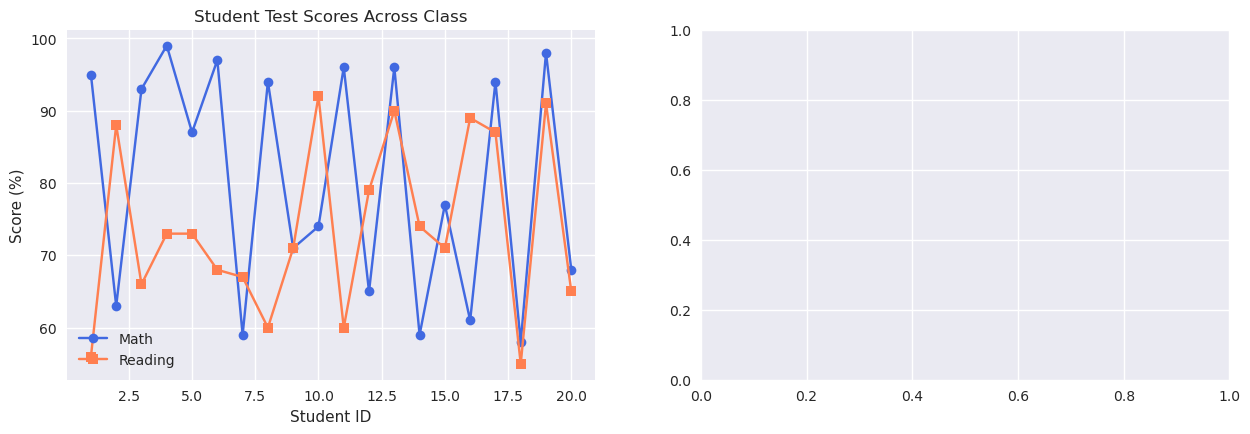

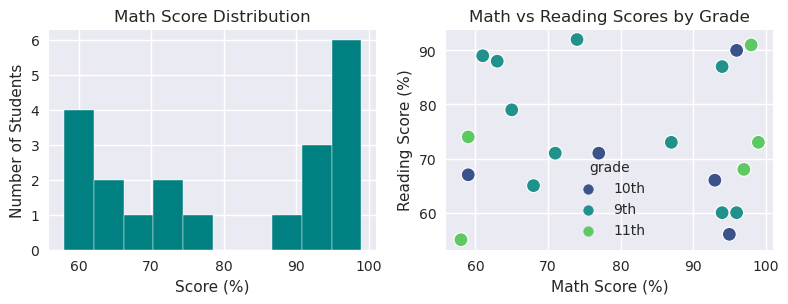

In [7]:
# Task 3: Data Visualization (School Performance Analysis)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

# Create sample school data if not already loaded
data = {
    'student_id': range(1, 21),
    'math_score': np.random.randint(50, 100, 20),
    'reading_score': np.random.randint(55, 95, 20),
    'grade': np.random.choice(['9th', '10th', '11th'], 20),
    'attendance': np.random.randint(70, 100, 20)
}
df = pd.DataFrame(data)

# 1. FIXED Line Chart (Test Scores Across Students)
plt.subplot(2, 2, 1)
plt.plot(df['student_id'], df['math_score'], marker='o', color='royalblue', label='Math')
plt.plot(df['student_id'], df['reading_score'], marker='s', color='coral', label='Reading')
plt.title('Student Test Scores Across Class')
plt.xlabel('Student ID')
plt.ylabel('Score (%)')
plt.legend()
plt.grid(True)

# 2. Bar Chart (Average Scores by Grade Level)
plt.subplot(2, 2, 2)
df.groupby('grade')[['math_score', 'reading_score']].mean().plot(kind='bar')
plt.title('Average Scores by Grade Level')
plt.xlabel('Grade')
plt.ylabel('Average Score (%)')
plt.xticks(rotation=0)

# 3. Histogram (Score Distribution)
plt.subplot(2, 2, 3)
plt.hist(df['math_score'], bins=10, color='teal', edgecolor='white')
plt.title('Math Score Distribution')
plt.xlabel('Score (%)')
plt.ylabel('Number of Students')

# 4. Scatter Plot (Math vs Reading Scores)
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='grade', palette='viridis', s=100)
plt.title('Math vs Reading Scores by Grade')
plt.xlabel('Math Score (%)')
plt.ylabel('Reading Score (%)')

plt.tight_layout()
plt.show()